In [1]:
#Utilize google_play_scraper package to pull app store reviews from google store
#Import app, Sort and reviews packages
from google_play_scraper import app
from google_play_scraper import Sort, reviews


#Import packages for pandas, numpy, regex, nltk and matplotlib
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from datetime import datetime

#Install google-play-scraper API if necessary
#!pip install google-play-scraper

# Google Play Store Robinhood App Reviews

In [2]:
#Create result object to search for Robinhood app
result = app(
    'com.robinhood.android',
    lang='en', # defaults to 'en'
    country='us' # defaults to 'us'
)

#View app info to confirm appID
print(result)

{'title': 'Robinhood - Investment & Trading, Commission-free', 'description': "Invest in stocks, options, and funds with Robinhood Financial. Buy and sell crypto like Bitcoin and Dogecoin with Robinhood Crypto. All commission-free with no account minimums. Other fees may apply*.\r\n\r\nWhether you’re new to the markets or an experienced trader, we have the tools to help you invest with greater confidence. From commission-free trading to award winning design, investing is now more approachable and affordable. To get you started, you’ll get your first stock on us. Certain limitations apply.\r\n\r\nHere's what you get when you join Robinhood:\r\n<b>Finance Explained</b> - We’ll help you better understand financial markets so you can invest in funds, stocks, and options, all commission-free.\r\n\r\n<b>Trading Tools</b> - \r\nBefore buying a stock, ETF, or cryptocurrency, you can access real-time market data, see analyst ratings, read relevant news articles, and get notified about important

In [3]:
#After confirming app, we can pull 5,000 reviews to analyze
result, continuation_token = reviews(
    'com.robinhood.android',
    lang='en', 
    country='us', 
    sort=Sort.MOST_RELEVANT, 
    count=5000, 
    filter_score_with=None  
)

#Store reviews in result object 
result, _ = reviews(
    'com.robinhood.android',
    continuation_token=continuation_token 
)

print(result)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
#Create pandas dataframe to store data
df = pd.DataFrame (result ,columns=['reviewId','userName','userImage','content','score','thumbsUpCount','reviewCreatedVersion','at','replyContent','repliedAt'])

#Confirm dataframe output
df

reviewId          userName  \
0     gp:AOqpTOHMEtur9u3MbRtH7uVCNIWzs2JHtxj7GknV3FV...             Logan   
1     gp:AOqpTOGKL7YwldYR7kqFwXezikvuV85Zq-hyVsuh44c...    alicia Johnson   
2     gp:AOqpTOFMekrSUaR2_odwjOE9BJNhlPctEt89PRVOxpR...     Sukrit Ranjan   
3     gp:AOqpTOEjggO2SugHUpwCuJ805y7kYEMkQW6xvX9Tag2...  Julian Maldonado   
4     gp:AOqpTOE0m5yZ1YWxeXFFmQilNFr9ysrCRcCvVfsUg4w...  Kenneth Chandler   
...                                                 ...               ...   
4995  gp:AOqpTOEmtxom0XJDA2SpPixoX2nQEfZyC96mDkbTUx7...      Laura Crisan   
4996  gp:AOqpTOFlEt1YnpKzj_kEQlGnOcV1410UZpdty44wnOT...        Anonymouse   
4997  gp:AOqpTOFtKEYj4YNx2Iar3opg6232wi-xnex-IIE9_jH...    Allen Naegelen   
4998  gp:AOqpTOGzlfKM0o2fdaPM51XMTjuGAZLhzJF293-i5L5...      Jeffrey Eide   
4999  gp:AOqpTOGkTOmrfVxPTfUXXOWD_5tv10y5vU8BNrkLNHk...             A. W.   

                                              userImage  \
0     https://play-lh.googleusercontent.com/a-/AOh14...   
1     https://play-lh.googleusercontent.com/a-/AOh14...   
2     https://play-lh.googleusercontent.com/a-/AOh14...   
3     https://play-lh.googleusercontent.com/a/AATXAJ...   
4     https://play-lh.googleusercontent.com/a-/AOh14...   
...                                                 ...   
4995  https://play-lh.googleusercontent.com/a-/AOh14...   
4996  https://play-lh.googleusercontent.com/a/AATXAJ...   
4997  https://play-lh.googleusercontent.com/a-/AOh14...   
4998  https://play-lh.googleusercontent.com/a-/AOh14...   
4999  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                                content  score  thumbsUpCount  \
0     Making the decision to uninstall and post this...      1              1   
1     Confusing. Navigation visuals unclear, very un...      2              0   
2     It's very hard to get helped when you need it....      2              1   
3     I've lost faith in this companies business pra...      1              0   
4     I was using other investment apps prior to swi...      5              0   
...                                                 ...    ...            ...   
4995  It's a great interface, but can't recommend th...      1              0   
4996  haven't tried pulling out money yet but so far...      5              2   
4997  Not a good platform for stocks or cryptocurren...      1              0   
4998  After multiple attempts to contact the adminis...      1              0   
4999  Many outages, company shuts down trading of lu...      1              0   

     reviewCreatedVersion                  at replyContent repliedAt  
0                  4.47.7 2021-02-08 18:06:41         None       NaT  
1                  4.53.4 2021-03-22 04:51:31         None       NaT  
2                  4.47.6 2021-02-18 09:39:06         None       NaT  
3                  4.50.3 2021-03-16 22:33:59         None       NaT  
4                  4.53.4 2021-03-21 07:23:13         None       NaT  
...                   ...                 ...          ...       ...  
4995               4.45.0 2021-01-28 17:33:50         None       NaT  
4996               4.41.4 2021-01-11 10:05:25         None       NaT  
4997               4.46.7 2021-02-02 16:38:36         None       NaT  
4998               4.45.1 2021-01-29 13:35:00         None       NaT  
4999               4.46.5 2021-01-30 05:40:22         None       NaT  

[5000 rows x 10 columns]

In [5]:
#Create separate dataframe, dropping unecessary columns
review_df = df[['reviewId','content','score','thumbsUpCount','reviewCreatedVersion','at','replyContent','repliedAt']]

#Verify dataframe output
review_df

reviewId  \
0     gp:AOqpTOHMEtur9u3MbRtH7uVCNIWzs2JHtxj7GknV3FV...   
1     gp:AOqpTOGKL7YwldYR7kqFwXezikvuV85Zq-hyVsuh44c...   
2     gp:AOqpTOFMekrSUaR2_odwjOE9BJNhlPctEt89PRVOxpR...   
3     gp:AOqpTOEjggO2SugHUpwCuJ805y7kYEMkQW6xvX9Tag2...   
4     gp:AOqpTOE0m5yZ1YWxeXFFmQilNFr9ysrCRcCvVfsUg4w...   
...                                                 ...   
4995  gp:AOqpTOEmtxom0XJDA2SpPixoX2nQEfZyC96mDkbTUx7...   
4996  gp:AOqpTOFlEt1YnpKzj_kEQlGnOcV1410UZpdty44wnOT...   
4997  gp:AOqpTOFtKEYj4YNx2Iar3opg6232wi-xnex-IIE9_jH...   
4998  gp:AOqpTOGzlfKM0o2fdaPM51XMTjuGAZLhzJF293-i5L5...   
4999  gp:AOqpTOGkTOmrfVxPTfUXXOWD_5tv10y5vU8BNrkLNHk...   

                                                content  score  thumbsUpCount  \
0     Making the decision to uninstall and post this...      1              1   
1     Confusing. Navigation visuals unclear, very un...      2              0   
2     It's very hard to get helped when you need it....      2              1   
3     I've lost faith in this companies business pra...      1              0   
4     I was using other investment apps prior to swi...      5              0   
...                                                 ...    ...            ...   
4995  It's a great interface, but can't recommend th...      1              0   
4996  haven't tried pulling out money yet but so far...      5              2   
4997  Not a good platform for stocks or cryptocurren...      1              0   
4998  After multiple attempts to contact the adminis...      1              0   
4999  Many outages, company shuts down trading of lu...      1              0   

     reviewCreatedVersion                  at replyContent repliedAt  
0                  4.47.7 2021-02-08 18:06:41         None       NaT  
1                  4.53.4 2021-03-22 04:51:31         None       NaT  
2                  4.47.6 2021-02-18 09:39:06         None       NaT  
3                  4.50.3 2021-03-16 22:33:59         None       NaT  
4                  4.53.4 2021-03-21 07:23:13         None       NaT  
...                   ...                 ...          ...       ...  
4995               4.45.0 2021-01-28 17:33:50         None       NaT  
4996               4.41.4 2021-01-11 10:05:25         None       NaT  
4997               4.46.7 2021-02-02 16:38:36         None       NaT  
4998               4.45.1 2021-01-29 13:35:00         None       NaT  
4999               4.46.5 2021-01-30 05:40:22         None       NaT  

[5000 rows x 8 columns]

# Robinhood Rating Time Series Analysis

In [6]:
import warnings
warnings.filterwarnings("ignore")

## Resampling Data  

In [7]:
#Create dataframe to hold scores and set datetimeIndex
score_df = review_df[['score','thumbsUpCount']]
score_df['date']= review_df['at']

score_df.set_index('date',inplace=True)
score_df.index

DatetimeIndex(['2021-02-08 18:06:41', '2021-03-22 04:51:31',
               '2021-02-18 09:39:06', '2021-03-16 22:33:59',
               '2021-03-21 07:23:13', '2021-04-29 17:55:22',
               '2021-04-27 15:34:12', '2021-05-05 13:31:54',
               '2021-02-14 09:32:29', '2021-03-17 17:49:55',
               ...
               '2021-01-10 14:23:01', '2021-01-29 11:03:52',
               '2021-02-01 18:55:28', '2021-01-31 22:25:14',
               '2021-01-29 13:05:49', '2021-01-28 17:33:50',
               '2021-01-11 10:05:25', '2021-02-02 16:38:36',
               '2021-01-29 13:35:00', '2021-01-30 05:40:22'],
              dtype='datetime64[ns]', name='date', length=5000, freq=None)

In [8]:
#Observe means from monthly data
score_df.resample(rule = 'M').mean()

score  thumbsUpCount
date                               
2020-11-30  2.472727      23.418182
2020-12-31  2.333333      35.903704
2021-01-31  1.249169      91.550071
2021-02-28  1.344981      16.240788
2021-03-31  3.283721       0.700000
2021-04-30  2.938272       0.524691
2021-05-31  3.328638       0.286385

In [9]:
#Observe counts of monthly data
score_df.resample(rule = 'M').count()

score  thumbsUpCount
date                            
2020-11-30     55             55
2020-12-31    135            135
2021-01-31   2107           2107
2021-02-28   1574           1574
2021-03-31    430            430
2021-04-30    486            486
2021-05-31    213            213

## Monthly Resampling Graphs

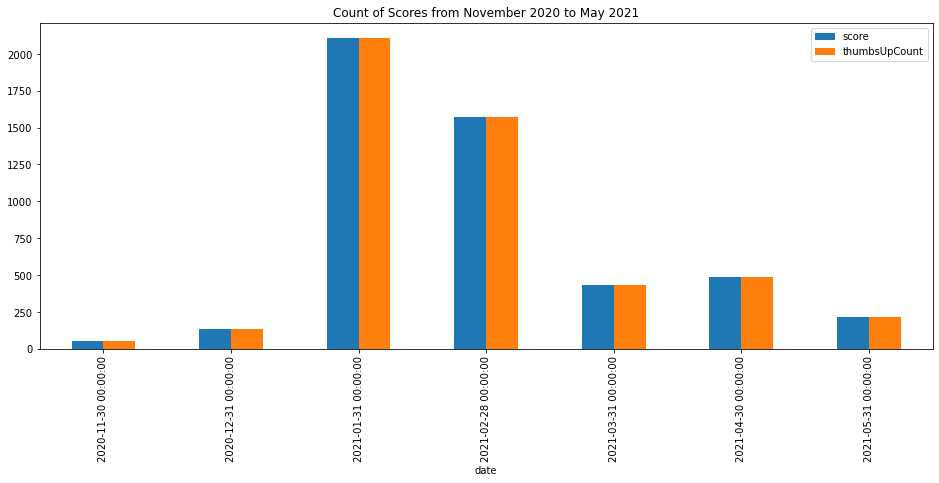

In [10]:
#Visualize resampling data
%matplotlib inline
title='Count of Scores from November 2020 to May 2021'
score_df.resample (rule='M').count().plot.bar(figsize =[16,6],title=title);

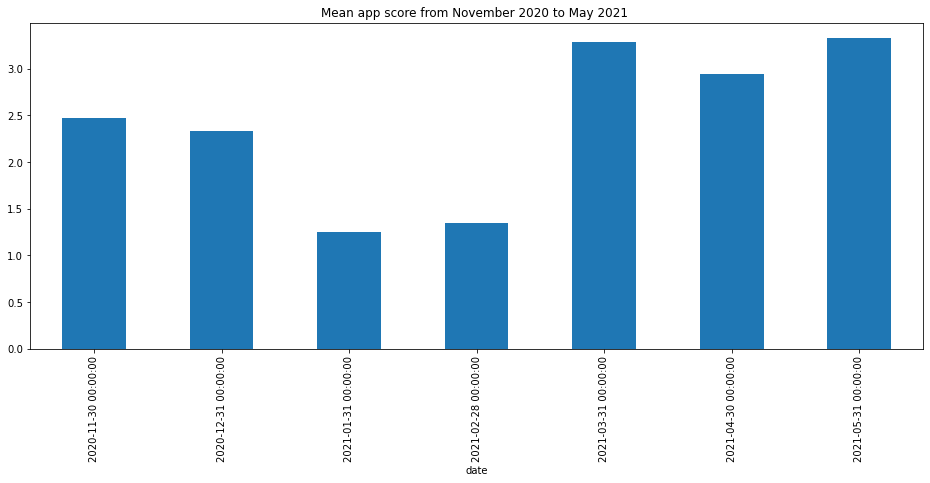

In [11]:
#Visualize mean scores on a monthly basis
%matplotlib inline
title='Mean app score from November 2020 to May 2021 '
score_df['score'].resample (rule='M').mean().plot.bar(figsize =[16,6],title=title, color=['#1f77b4']);

In [12]:
#The main trend we see a lare drop in average app scores from January to February, with a large spike only at the end of March.
#The drop in mean score correlates to user's sentiment on the app during the GME event, but how much of this is due to
#dogpiling and alternate accounts is unknown. Nevertheless, comments from these posts will help further reveal insight into
#user sentiment.

In [13]:
#Create column for 30 day mean scores
score_df['30 Day Mean Score']= score_df['score'].rolling (window = 30).mean()

In [14]:
#Verify output
score_df

score  thumbsUpCount  30 Day Mean Score
date                                                        
2021-02-08 18:06:41      1              1                NaN
2021-03-22 04:51:31      2              0                NaN
2021-02-18 09:39:06      2              1                NaN
2021-03-16 22:33:59      1              0                NaN
2021-03-21 07:23:13      5              0                NaN
...                    ...            ...                ...
2021-01-28 17:33:50      1              0           1.733333
2021-01-11 10:05:25      5              2           1.733333
2021-02-02 16:38:36      1              0           1.733333
2021-01-29 13:35:00      1              0           1.733333
2021-01-30 05:40:22      1              0           1.700000

[5000 rows x 3 columns]

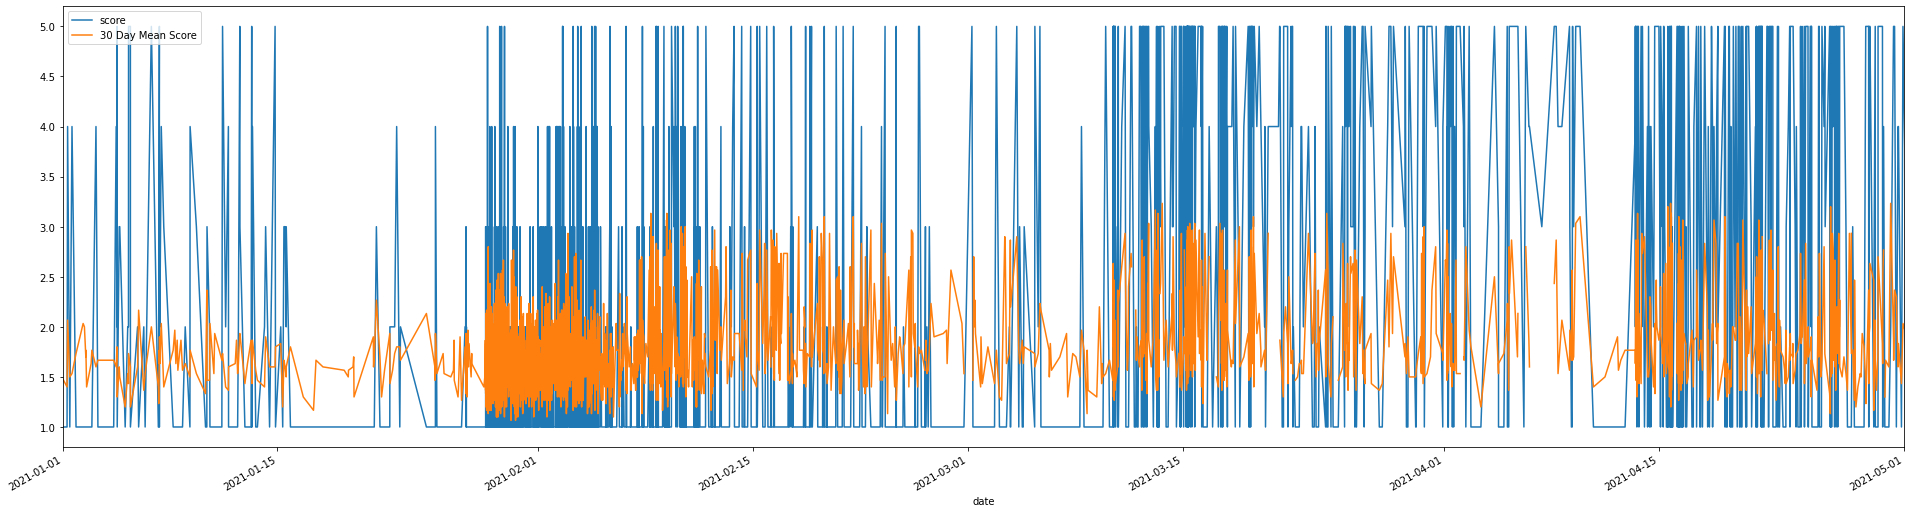

In [15]:
#Create plot comparing scores to 30 day mean
score_df[['score','30 Day Mean Score']].plot (figsize=(33,9),xlim=['2021-01-01','2021-05-01']);

In [16]:
#While score is much more volatile, due to the reports being sampled, we see a large 
#amount of 0 scores around and after Jan 15th.

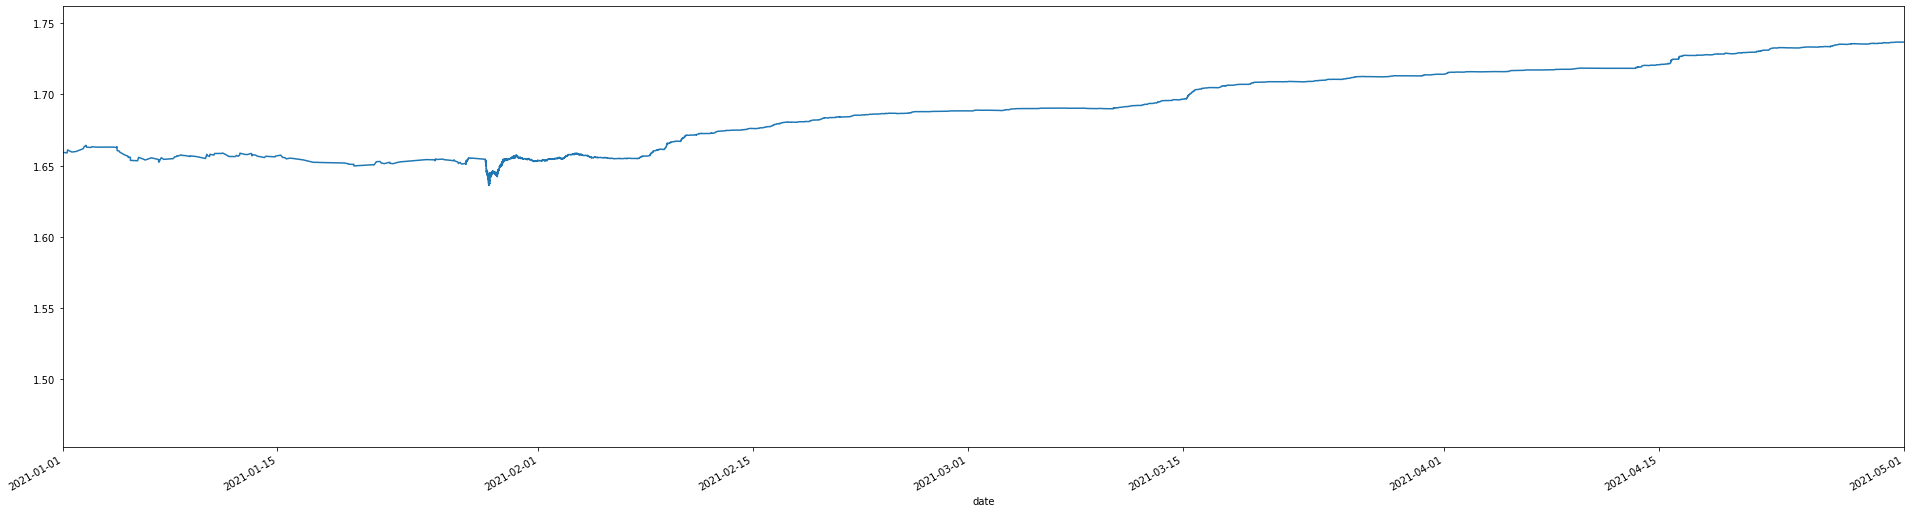

In [82]:
score_df['30 Day Mean Score'].expanding().mean().plot(figsize=(33,9), xlim=['2021-01-01','2021-05-01']);

In [18]:
#Our expanding graph also reveals a low point right at the end of January 2021, which many retail investors pointed was the 
#deadline of the short squeeze during the GME event.

## ETS Decomposition 

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
score_df.sort_index(inplace=True)

In [21]:
result = seasonal_decompose(score_df['score'].values, model = 'additive', period=30)

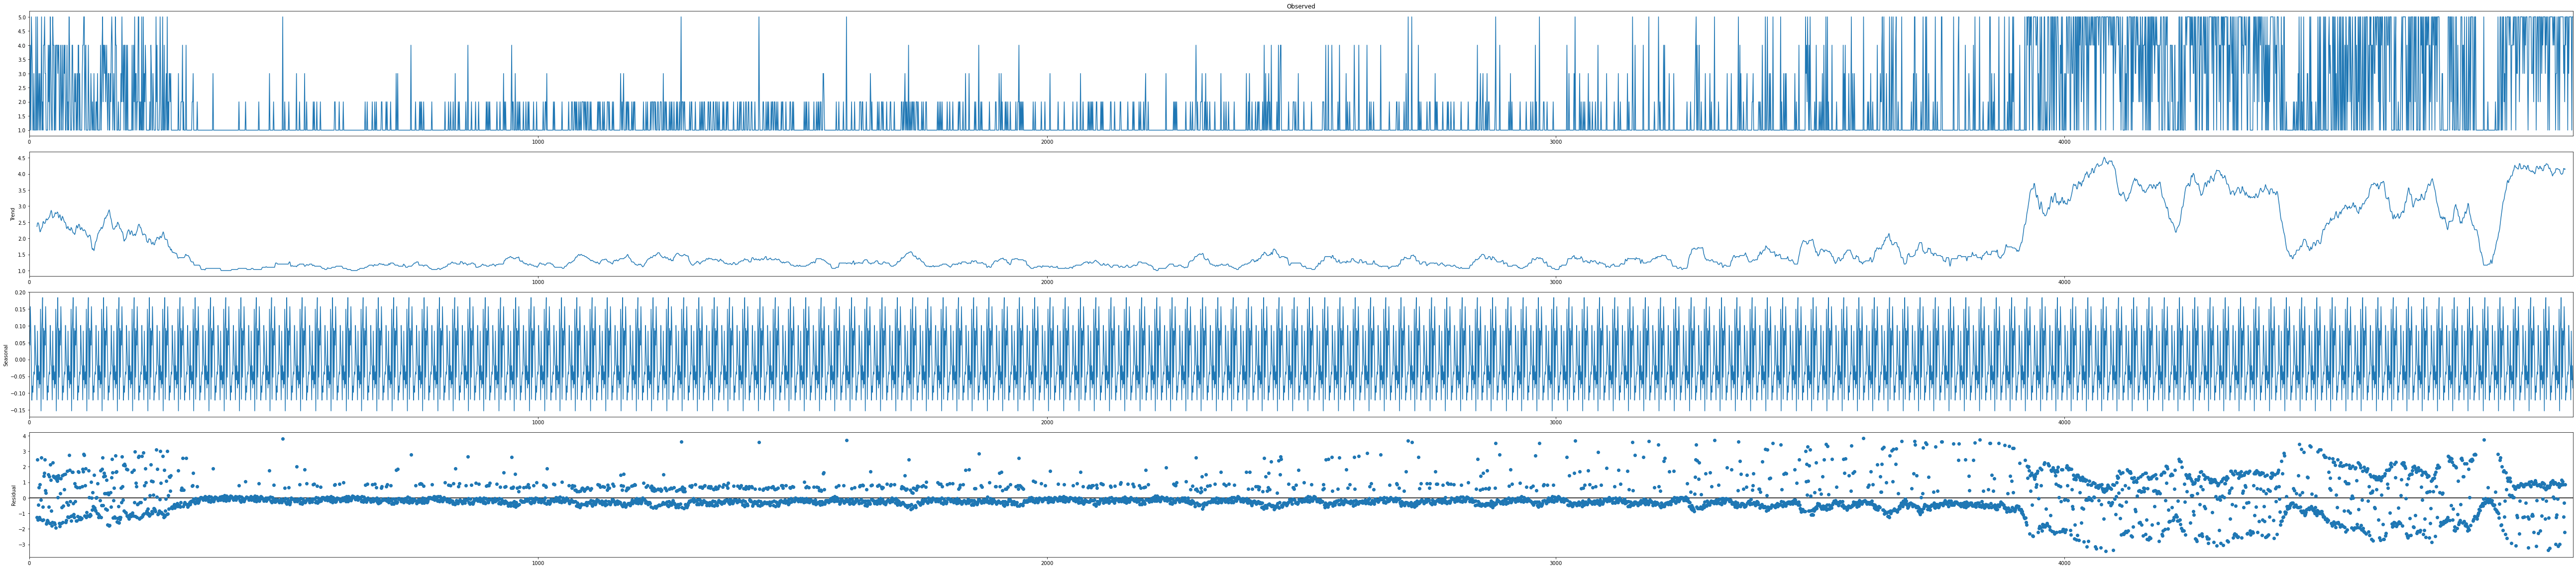

In [22]:
#change the plot parameters 
from pylab import rcParams
rcParams['figure.figsize']=72,16
result.plot();

In [23]:
#Our observational and trend graphs show an interesting distinction as compared to our seasonal graph. Both observational and
#trend graphs show that there was indeed an influx of negative reviews for the app during the January-February period, but
#the seasonality graph shows that this did not significatly alter seasonality.

#Interestingly, our residuals graphs shows a relatively consistent residual count until the tail end of our data, where the 
#residuals begin to fluctuate wildly. What this means is that there is a large fluctuation between what the observed scores were
#compared to the model's values. As this relates to scores later in the sample, it shows that the trend in new scores was not 
#anticipated by the model. Whether this is due to the Google Play Store attempting to remove dummy account reviews, or perhaps
#boosted positive reviews, we cannot state, but the low-level residuals for the Jan-Feb data is worth noting.

## Exponential Weighted Moving Average and Exponential Smoothing Analysis

In [ ]:
#As seasonality did not see major changes in our ETS composition graph, we decided to use an additive method for our Exponential
#and Double Exponential Smoothing analysis.

In [24]:
#Simple Exponetial Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [25]:
#Set span and alpha parameters
span = 12
alpha = 2/ (span+1)

In [99]:
#Create column to hold Estimated Weighted Moving Average
score_df['EWMA12'] = score_df['score'].ewm(alpha=alpha, adjust = False).mean()

score_df.head()

score  thumbsUpCount  30 Day Mean Score    EWMA12  \
date                                                                     
2020-11-12 21:18:39      1              4           1.500000  1.000000   
2020-11-13 02:58:57      1              3           1.500000  1.000000   
2020-11-13 09:10:01      4             39           1.400000  1.461538   
2020-11-13 16:25:54      1              5           1.700000  1.390533   
2020-11-14 14:34:28      5             43           1.633333  1.945835   

                        SES12  DESadd12  TESadd12  
date                                               
2020-11-12 21:18:39  1.000000  2.214132       NaN  
2020-11-13 02:58:57  1.000000  2.135710       NaN  
2020-11-13 09:10:01  1.461538  2.257098       NaN  
2020-11-13 16:25:54  1.390533  2.175887       NaN  
2020-11-14 14:34:28  1.945835  2.359574       NaN

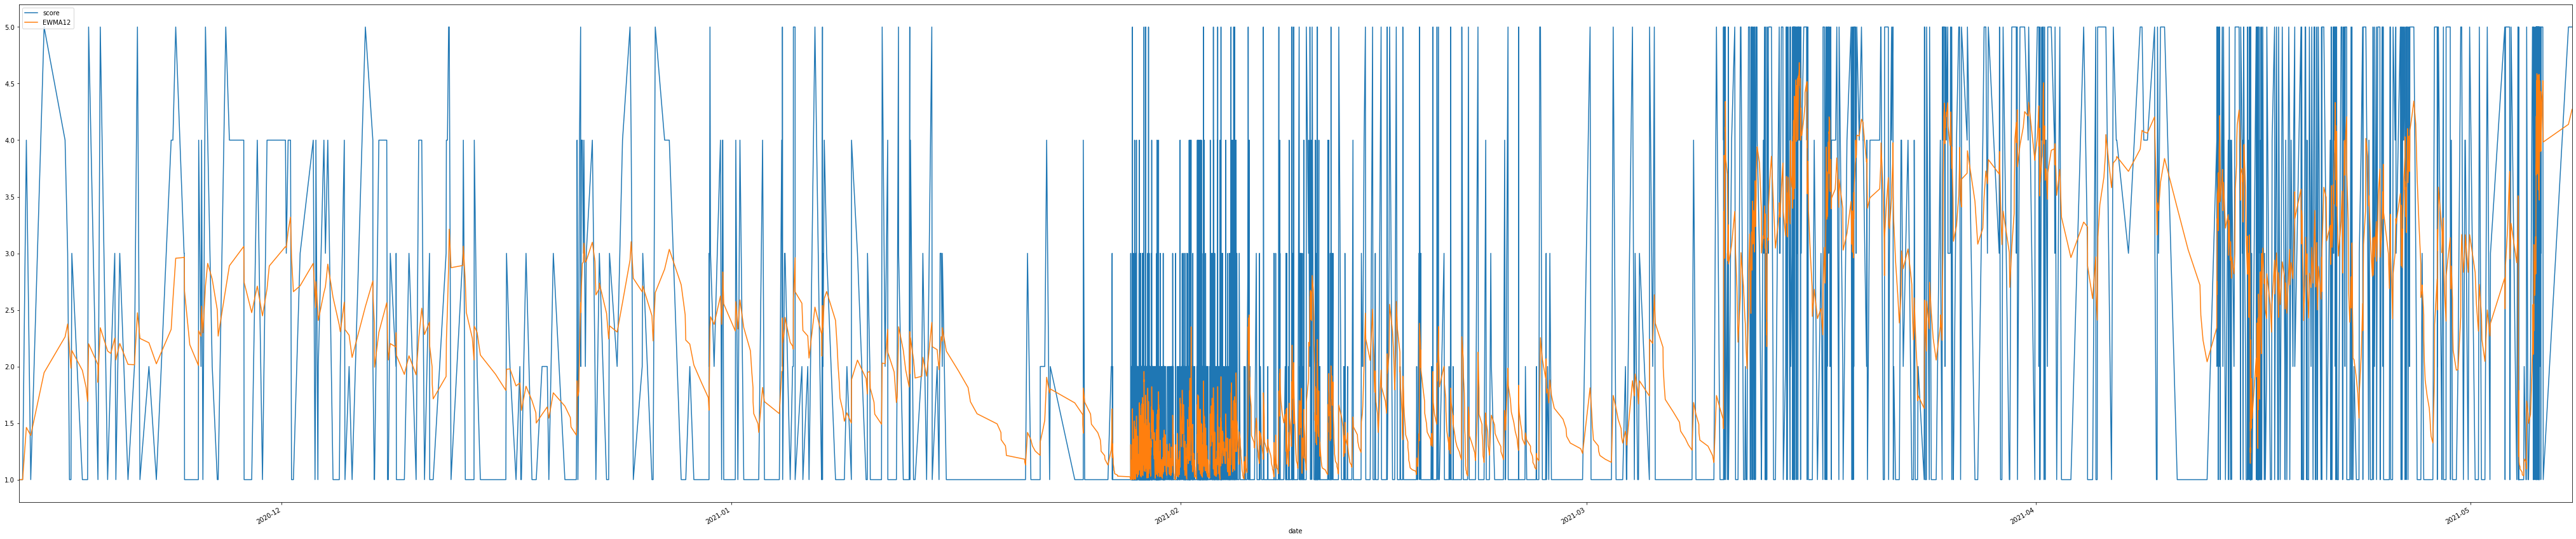

In [88]:
#Graph score with Exponential Weighted Moving Average
score_df[['score','EWMA12']].plot(figsize=(72,16)).autoscale(axis='x',tight=True);

In [89]:
#Apply Simple Exponential Smoothing to our score column
model = SimpleExpSmoothing(score_df['score'])

D:\Program Files\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [90]:
#Fit the model according to our previously set alpha parameter
model.fit(smoothing_level=alpha,optimized=False)

In [91]:
#Create fitted_model opbject to store the fitted model
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [92]:
#because values are shifted, we need to shift them back by 1
fitted_model.fittedvalues.shift(-1)

date
2020-11-12 21:18:39    1.000000
2020-11-13 02:58:57    1.000000
2020-11-13 09:10:01    1.461538
2020-11-13 16:25:54    1.390533
2020-11-14 14:34:28    1.945835
                         ...   
2021-05-05 23:10:45    4.439294
2021-05-05 23:32:08    4.525556
2021-05-06 00:09:26    3.983163
2021-05-07 17:55:47    4.139599
2021-05-07 23:54:44         NaN
Length: 5000, dtype: float64

In [93]:
#Create a column for our shifted values
score_df['SES12'] = fitted_model.fittedvalues.shift(-1)
score_df.head()

score  thumbsUpCount  30 Day Mean Score    EWMA12  \
date                                                                     
2020-11-12 21:18:39      1              4           1.500000  1.000000   
2020-11-13 02:58:57      1              3           1.500000  1.000000   
2020-11-13 09:10:01      4             39           1.400000  1.461538   
2020-11-13 16:25:54      1              5           1.700000  1.390533   
2020-11-14 14:34:28      5             43           1.633333  1.945835   

                        SES12  DESadd12  TESadd12  
date                                               
2020-11-12 21:18:39  1.000000  1.519474       NaN  
2020-11-13 02:58:57  1.000000  1.528449       NaN  
2020-11-13 09:10:01  1.461538  1.531687       NaN  
2020-11-13 16:25:54  1.390533  1.550546       NaN  
2020-11-14 14:34:28  1.945835  1.564904       NaN

In [94]:
#import Exponential Smoothing for Exponential Smoothing Analysis
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
### Create column with Double Exponential Smoothing applied to our score column
score_df['DESadd12'] = ExponentialSmoothing(score_df['score'], trend='add').fit().fittedvalues.shift(-1)

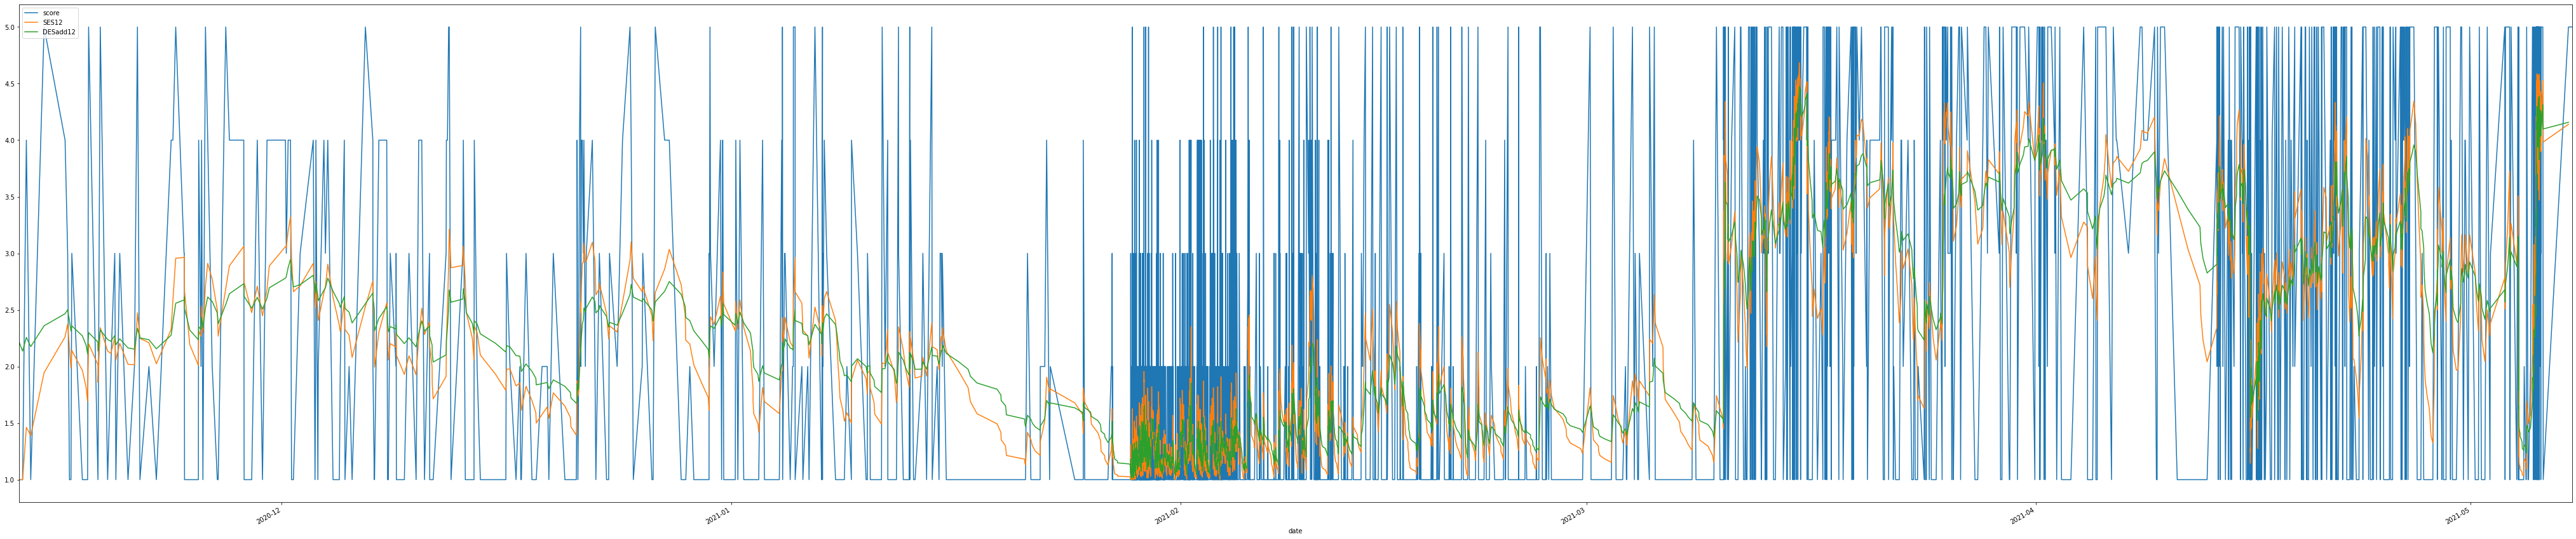

In [98]:
#Graph score with Simple Exponential Smoothing Average and Double Exponential Smoothing
score_df[['score','SES12','DESadd12']].plot(figsize=(72,16)).autoscale(axis='x',tight=True);

In [35]:
#Our Double Exponential Smoothing following the additive method roughly follows our data. While the forecast is overall similar,
#it is forecasting above the average for score, seemingly focusing on the higher end for our earlier data. However,
#it captures the end of January-February period well, which is the specific timeframe in which the GME event occurs. 

#This could be due to the relatively small amount of data from November to December in our dataset, nevertheless the model's
#forecast in our interested timeframe is adequate.

#While a triple-exponential smoothing forecast could potentially further enhance our forecasting, our data is not structured
#within a seasonal format, being a random sample of reviews from the Google Play Store.

# Review Text Analysis

In [39]:
#Place text into separate dataframe for cleaning
content_df = review_df['content']
content_df

0       Making the decision to uninstall and post this...
1       Confusing. Navigation visuals unclear, very un...
2       It's very hard to get helped when you need it....
3       I've lost faith in this companies business pra...
4       I was using other investment apps prior to swi...
                              ...                        
4995    It's a great interface, but can't recommend th...
4996    haven't tried pulling out money yet but so far...
4997    Not a good platform for stocks or cryptocurren...
4998    After multiple attempts to contact the adminis...
4999    Many outages, company shuts down trading of lu...
Name: content, Length: 5000, dtype: object

In [40]:
#Import Beautiful Soup to clean HTML tags
import bs4
from bs4 import BeautifulSoup

In [41]:
#Use lambda function to strip HTML tags
content_df = content_df.apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text())

#Verify corpus_df output
content_df

0       Making the decision to uninstall and post this...
1       Confusing. Navigation visuals unclear, very un...
2       It's very hard to get helped when you need it....
3       I've lost faith in this companies business pra...
4       I was using other investment apps prior to swi...
                              ...                        
4995    It's a great interface, but can't recommend th...
4996    haven't tried pulling out money yet but so far...
4997    Not a good platform for stocks or cryptocurren...
4998    After multiple attempts to contact the adminis...
4999    Many outages, company shuts down trading of lu...
Name: content, Length: 5000, dtype: object

In [42]:
#Place text into specific corpus object for cleaning
cleaned_corpus = content_df
cleaned_corpus

0       Making the decision to uninstall and post this...
1       Confusing. Navigation visuals unclear, very un...
2       It's very hard to get helped when you need it....
3       I've lost faith in this companies business pra...
4       I was using other investment apps prior to swi...
                              ...                        
4995    It's a great interface, but can't recommend th...
4996    haven't tried pulling out money yet but so far...
4997    Not a good platform for stocks or cryptocurren...
4998    After multiple attempts to contact the adminis...
4999    Many outages, company shuts down trading of lu...
Name: content, Length: 5000, dtype: object

## Review Text Preprocessing

In [43]:
#define WordPunctTokenizer and stopwords objects
wpt=nltk.WordPunctTokenizer()
stop_words=nltk.corpus.stopwords.words('english')

In [44]:
#Define normalize_corpus method to apply preprocessing, including regex formatting and tokenizing corpus

def normalize_doc (doc):
    doc=re.sub('[^a-zA-Z\s0-9]+',"", doc, re.I|re.A)
    doc=doc.lower()
    doc=doc.strip()
    tokens=wpt.tokenize(doc)
    filtered_tokens=[token for token in tokens if token not in stop_words]
    doc=' '.join(filtered_tokens)
    return doc

In [45]:
#Create pipeline to normalize corpus
normalize_corpus=np.vectorize(normalize_doc)

In [46]:
#Create normalized corpus dataframe and apply normalization pipeline to corpus
normalized_corpus = normalize_corpus(cleaned_corpus)

#Verify corpus output
normalized_corpus

array(['making decision uninstall post easy one loyal follower since 2015 watched rh become phenomenal app difficult find well developed trustworthy app thought appalled beyond words handling recent incidents last time waste duplicity dante alighieri wrote darkest places hell reserved times great moral crisis maintain neutrality',
       'confusing navigation visuals unclear unattractive app',
       'hard get helped need got locked account respond emails week request twitter finally got sammi solved problem day without intervention would 1 star review would stinker poor support ok game something service keep thousands dollars ok need minimum live chat phone option without cant recommend',
       ...,
       'good platform stocks cryptocurrencies lock buying certain stocks missed ome really good investments also important dont allow transfer cryptocurrencies wallets makes basically useless overall bad app disappointed',
       'multiple attempts contact administrator last year given tr

## Create CV Matrix

In [47]:
#Import count vectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

#Create cv object to vectorize corpus
cv = CountVectorizer(min_df=0., max_df=1.)

#Create cv_matrix object to create matrix from corpus
cv_matrix=cv.fit_transform(normalized_corpus)
cv_matrix

<5000x8503 sparse matrix of type '<class 'numpy.int64'>'
	with 115991 stored elements in Compressed Sparse Row format>

In [48]:
#Create array representation to verify output
cv_matrix=cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
#Create vocab object to hold important feature names, and create dataframe to display matrix and feature names
vocab=cv.get_feature_names()
pd.DataFrame(cv_matrix,columns=vocab)

000  001  005  0061  008  009  01  010  0100  01012020  ...  youtube  \
0       0    0    0     0    0    0   0    0     0         0  ...        0   
1       0    0    0     0    0    0   0    0     0         0  ...        0   
2       0    0    0     0    0    0   0    0     0         0  ...        0   
3       0    0    0     0    0    0   0    0     0         0  ...        0   
4       0    0    0     0    0    0   0    0     0         0  ...        0   
...   ...  ...  ...   ...  ...  ...  ..  ...   ...       ...  ...      ...   
4995    0    0    0     0    0    0   0    0     0         0  ...        0   
4996    0    0    0     0    0    0   0    0     0         0  ...        0   
4997    0    0    0     0    0    0   0    0     0         0  ...        0   
4998    0    0    0     0    0    0   0    0     0         0  ...        0   
4999    0    0    0     0    0    0   0    0     0         0  ...        0   

      youtubers  youve  yr  yuck  yuh  zero  zerofee  zone  zoom  
0             0      0   0     0    0     0        0     0     0  
1             0      0   0     0    0     0        0     0     0  
2             0      0   0     0    0     0        0     0     0  
3             0      0   0     0    0     0        0     0     0  
4             0      0   0     0    0     0        0     0     0  
...         ...    ...  ..   ...  ...   ...      ...   ...   ...  
4995          0      0   0     0    0     0        0     0     0  
4996          0      0   0     0    0     0        0     0     0  
4997          0      0   0     0    0     0        0     0     0  
4998          0      0   0     0    0     0        0     0     0  
4999          0      0   0     0    0     0        0     0     0  

[5000 rows x 8503 columns]

## TF-IDF 

In [50]:
#Import TfidfTransformer from sklearn
from sklearn.feature_extraction.text import TfidfTransformer

In [51]:
#Apply TFidf to matrix

tft=TfidfTransformer(norm='l2', use_idf=True)
tft_matrix=tft.fit_transform(cv_matrix)
tft_matrix=tft_matrix.toarray()
vocab=cv.get_feature_names()
pd.DataFrame(np.round(tft_matrix,2), columns=vocab)

000  001  005  0061  008  009   01  010  0100  01012020  ...  youtube  \
0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0       0.0  ...      0.0   
1     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0       0.0  ...      0.0   
2     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0       0.0  ...      0.0   
3     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0       0.0  ...      0.0   
4     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0       0.0  ...      0.0   
...   ...  ...  ...   ...  ...  ...  ...  ...   ...       ...  ...      ...   
4995  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0       0.0  ...      0.0   
4996  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0       0.0  ...      0.0   
4997  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0       0.0  ...      0.0   
4998  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0       0.0  ...      0.0   
4999  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0       0.0  ...      0.0   

      youtubers  youve   yr  yuck  yuh  zero  zerofee  zone  zoom  
0           0.0    0.0  0.0   0.0  0.0   0.0      0.0   0.0   0.0  
1           0.0    0.0  0.0   0.0  0.0   0.0      0.0   0.0   0.0  
2           0.0    0.0  0.0   0.0  0.0   0.0      0.0   0.0   0.0  
3           0.0    0.0  0.0   0.0  0.0   0.0      0.0   0.0   0.0  
4           0.0    0.0  0.0   0.0  0.0   0.0      0.0   0.0   0.0  
...         ...    ...  ...   ...  ...   ...      ...   ...   ...  
4995        0.0    0.0  0.0   0.0  0.0   0.0      0.0   0.0   0.0  
4996        0.0    0.0  0.0   0.0  0.0   0.0      0.0   0.0   0.0  
4997        0.0    0.0  0.0   0.0  0.0   0.0      0.0   0.0   0.0  
4998        0.0    0.0  0.0   0.0  0.0   0.0      0.0   0.0   0.0  
4999        0.0    0.0  0.0   0.0  0.0   0.0      0.0   0.0   0.0  

[5000 rows x 8503 columns]

In [52]:
#Import cosine_similarity for document similarity
from sklearn.metrics.pairwise import cosine_similarity 

In [53]:
#Create similarity_matrix object to calculate cosine similarity, passing tf-idf matrix as argument
similarity_matrix = cosine_similarity(tft_matrix)

#Create dataframe to store similarity matrix data
similarity_df = pd.DataFrame(similarity_matrix)


#Confirm dataframe output
similarity_df

0         1         2         3         4         5         6     \
0     1.000000  0.007247  0.000000  0.004608  0.011926  0.004413  0.000000   
1     0.007247  1.000000  0.000000  0.006176  0.000000  0.005915  0.000000   
2     0.000000  0.000000  1.000000  0.016532  0.058959  0.023375  0.054533   
3     0.004608  0.006176  0.016532  1.000000  0.014725  0.118622  0.016511   
4     0.011926  0.000000  0.058959  0.014725  1.000000  0.014101  0.023011   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.022881  0.010802  0.046929  0.047642  0.000000  0.045623  0.000000   
4996  0.031352  0.006689  0.032556  0.013507  0.000000  0.014360  0.000000   
4997  0.004277  0.005732  0.000000  0.086879  0.000000  0.025581  0.030648   
4998  0.012705  0.000000  0.031535  0.009229  0.041257  0.052339  0.000000   
4999  0.018832  0.000000  0.006973  0.053526  0.037163  0.045546  0.011941   

          7         8         9     ...      4990      4991      4992  \
0     0.015871  0.000000  0.030838  ...  0.006249  0.018680  0.012098   
1     0.000000  0.000000  0.009399  ...  0.008376  0.009084  0.016216   
2     0.000000  0.000000  0.000000  ...  0.029013  0.036829  0.018272   
3     0.102544  0.000000  0.043398  ...  0.026502  0.035526  0.017789   
4     0.000000  0.000000  0.022408  ...  0.000000  0.059668  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
4995  0.000000  0.000000  0.010452  ...  0.009315  0.010102  0.018034   
4996  0.051222  0.000000  0.006472  ...  0.050073  0.028226  0.019265   
4997  0.038320  0.000000  0.005547  ...  0.004943  0.130717  0.072905   
4998  0.014579  0.000000  0.014044  ...  0.000000  0.000000  0.007000   
4999  0.014930  0.023248  0.055291  ...  0.025663  0.064911  0.000000   

          4993      4994      4995      4996      4997      4998      4999  
0     0.011960  0.007628  0.022881  0.031352  0.004277  0.012705  0.018832  
1     0.016031  0.010224  0.010802  0.006689  0.005732  0.000000  0.000000  
2     0.000000  0.031489  0.046929  0.032556  0.000000  0.031535  0.006973  
3     0.025474  0.006501  0.047642  0.013507  0.086879  0.009229  0.053526  
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.041257  0.037163  
...        ...       ...       ...       ...       ...       ...       ...  
4995  0.017828  0.011370  1.000000  0.034797  0.006375  0.056791  0.000000  
4996  0.011039  0.024823  0.034797  1.000000  0.003947  0.007735  0.000000  
4997  0.039397  0.006034  0.006375  0.003947  1.000000  0.000000  0.030262  
4998  0.000000  0.011824  0.056791  0.007735  0.000000  1.000000  0.007080  
4999  0.045432  0.000000  0.000000  0.000000  0.030262  0.007080  1.000000  

[5000 rows x 5000 columns]

In [54]:
#Import dendogram and linkage packages from scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [55]:
#Create object to create linkage array
linkage_array = linkage (similarity_matrix, 'ward')
linkage_array

array([[2.62000000e+02, 1.05600000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.56200000e+03, 5.00000000e+03, 0.00000000e+00, 3.00000000e+00],
       [2.70000000e+01, 4.49900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.99100000e+03, 9.99500000e+03, 3.57381531e+01, 3.57100000e+03],
       [9.99200000e+03, 9.99600000e+03, 4.26120397e+01, 4.77300000e+03],
       [9.99400000e+03, 9.99700000e+03, 7.59261055e+01, 5.00000000e+03]])

In [56]:
#Create document cluster dataframe
pd.DataFrame(linkage_array, columns=['Documents\Cluster 1','Documents\Cluster 2',
                        'Distance', 'Cluster Size'], dtype='object')

Documents\Cluster 1 Documents\Cluster 2 Distance Cluster Size
0                    262                1056        0            2
1                   3562                5000        0            3
2                     27                4499        0            2
3                   3685                3790        0            2
4                   1392                1741        0            2
...                  ...                 ...      ...          ...
4994                9983                9993  22.0452          227
4995                9980                9988  29.9619         1404
4996                9991                9995  35.7382         3571
4997                9992                9996   42.612         4773
4998                9994                9997  75.9261         5000

[4999 rows x 4 columns]

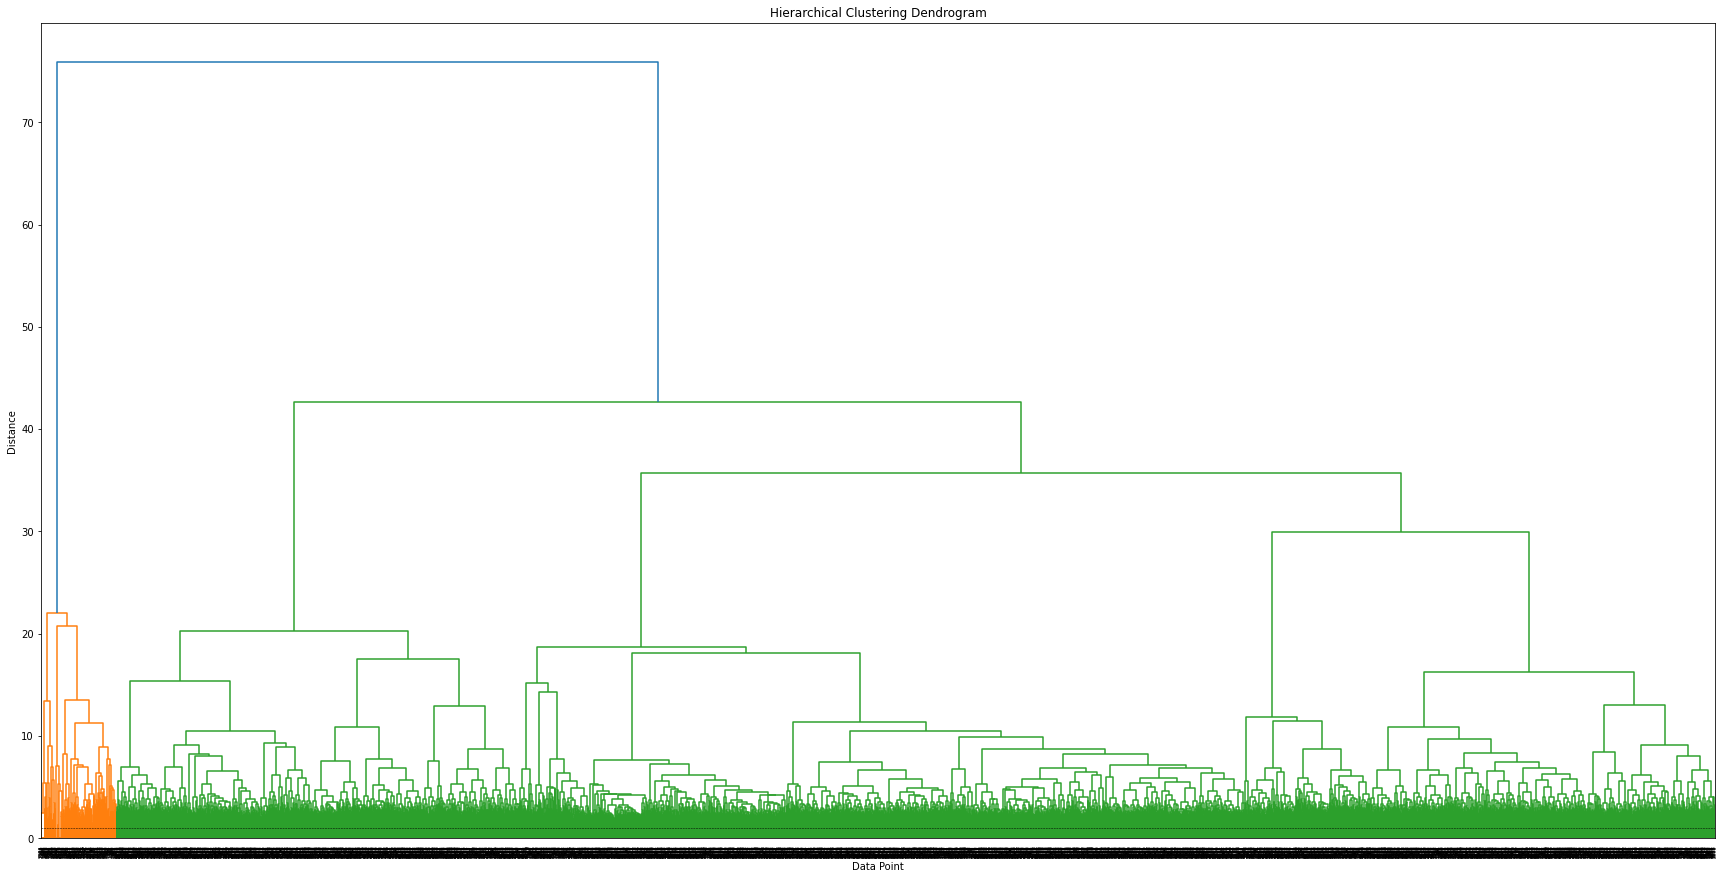

In [57]:
#Define figsize, title, and labels for dendogram
plt.figure (figsize = (30,15))
plt.title ('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')


#print dendogram with similarity matrix as the argument
dendrogram(linkage_array)
plt.axhline(y=1.0,c='k',ls='--',lw=0.5);

In [58]:
#Our dendogram shows two distinct categories, showing a high amount of similarity between reviews.

#This is expected, and much less diversity was expected between this and the reddit posts due to the specific nature of review
#commentary, which is focused on the assessment of the apps.

In [59]:
#Import fcluster package from scipy
from scipy.cluster.hierarchy import fcluster

In [60]:
#Create cluster label dataframe
max_dist = 1.0
cluster_lables = fcluster(linkage_array,max_dist, criterion='distance')
cluster_lables = pd.DataFrame(cluster_lables,columns=['ClusterLabel'])
pd.concat([content_df,cluster_lables],axis=1)

content  ClusterLabel
0     Making the decision to uninstall and post this...          2099
1     Confusing. Navigation visuals unclear, very un...          1739
2     It's very hard to get helped when you need it....           330
3     I've lost faith in this companies business pra...          3968
4     I was using other investment apps prior to swi...          2570
...                                                 ...           ...
4995  It's a great interface, but can't recommend th...          1559
4996  haven't tried pulling out money yet but so far...          3872
4997  Not a good platform for stocks or cryptocurren...          3995
4998  After multiple attempts to contact the adminis...           585
4999  Many outages, company shuts down trading of lu...          4527

[5000 rows x 2 columns]

## LSA Topic Modelling

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [62]:
#Create an instance of vectorizer and fit corpus data into object X
vectorizer = TfidfVectorizer ()
X = vectorizer.fit_transform (normalized_corpus)

In [63]:
#Create lsa object to apply SVD to vectorized corpus
lsa = TruncatedSVD (n_components=20, n_iter=750)
lsa.fit(X)

TruncatedSVD(n_components=20, n_iter=750)

In [64]:
#check first row of lsa object to confirm output
row1 = lsa.components_[0] 
row1

array([0.00086823, 0.00037376, 0.00021279, ..., 0.00055804, 0.00046552,
       0.00127111])

In [65]:
#Create terms object to browse feature names
terms = vectorizer.get_feature_names()
terms

['000',
 '001',
 '005',
 '0061',
 '008',
 '009',
 '01',
 '010',
 '0100',
 '01012020',
 '01272021',
 '012721',
 '0128',
 '01282021',
 '012821',
 '01292021',
 '02',
 '0203',
 '020921',
 '02182020',
 '03292021',
 '04',
 '04282021',
 '05',
 '059',
 '065',
 '08',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000000th',
 '1000s',
 '100k',
 '101',
 '1010',
 '1015',
 '1015k',
 '1020',
 '104',
 '1045',
 '105',
 '1099',
 '10am',
 '10k',
 '10s',
 '10th',
 '10yearold',
 '11',
 '110',
 '1110',
 '1112021',
 '1150',
 '11521',
 '116th',
 '117',
 '12',
 '120',
 '1200',
 '12000',
 '1200pm',
 '12021',
 '120k',
 '1230',
 '125k',
 '127',
 '1272021',
 '12721',
 '1272112821',
 '128',
 '12820',
 '1282021',
 '12821',
 '129',
 '1292021',
 '12921',
 '13',
 '130',
 '1300',
 '13k',
 '13rd',
 '14',
 '140',
 '1400',
 '1417',
 '147',
 '15',
 '150',
 '1500',
 '150d',
 '1520',
 '1545',
 '1560',
 '15ish',
 '15k',
 '15mins',
 '15theven',
 '16',
 '160',
 '16th',
 '17',
 '170',
 '172',
 '17718076',
 '17th',
 '18',
 '180'

In [66]:
#Use a loop to find concepts and terms associated with them

#enumerate returns index and row tuples in lsa object
for i,comp in enumerate(lsa.components_): 
    componentTerms = zip(terms,comp) 
    #sort component terms, by concept value,lambda x (x correpsnding tuples) and X[1] the value
    sortedTerms = sorted(componentTerms, key=lambda x:x[1], reverse=True) #decending order
    sortedTerms = sortedTerms[:15] #select 15 most important terms within a concept
    print ("\nConcept",i,":")
    for term in sortedTerms:
        print (term)


Concept 0 :
('app', 0.3144863850177459)
('use', 0.23142005950658243)
('easy', 0.22907331881239587)
('money', 0.18986239186117615)
('stocks', 0.1596200739851341)
('account', 0.14825150806501033)
('buy', 0.14625758361322955)
('trading', 0.1328804378542925)
('great', 0.13202843117925825)
('stock', 0.12387783153976112)
('get', 0.120175862849023)
('robinhood', 0.1194372419608814)
('market', 0.113457393844317)
('dont', 0.1091759224886768)
('service', 0.1080695364114291)

Concept 1 :
('easy', 0.7151592842858204)
('use', 0.4766948769075384)
('navigate', 0.15235606613013025)
('understand', 0.15015459459591302)
('love', 0.12784732324620363)
('great', 0.09726629741519019)
('simple', 0.0646454897295096)
('fun', 0.04383686573617477)
('super', 0.03513860037177675)
('informative', 0.028478090560252765)
('beginners', 0.0280233623161548)
('good', 0.0242391128736241)
('friendly', 0.023615501461039527)
('beginner', 0.020552884876670008)
('fees', 0.017508258788071444)

Concept 2 :
('account', 0.370405986

In [67]:
#create an empty dictionary to hold concepts and associated words
concept_words = {} 

In [68]:
#Loop through again to store concepts and associated words in concept_words dictionary
for i,comp in enumerate(lsa.components_):
    componentTerms = zip(terms,comp)
    
    sortedTerms = sorted(componentTerms, key=lambda x:x[1], reverse=True) 
    sortedTerms = sortedTerms[:15] 
    concept_words["Concept " + str(i)] = sortedTerms 

In [69]:
#View concepts 
concept_words

{'Concept 0': [('app', 0.3144863850177459),
  ('use', 0.23142005950658243),
  ('easy', 0.22907331881239587),
  ('money', 0.18986239186117615),
  ('stocks', 0.1596200739851341),
  ('account', 0.14825150806501033),
  ('buy', 0.14625758361322955),
  ('trading', 0.1328804378542925),
  ('great', 0.13202843117925825),
  ('stock', 0.12387783153976112),
  ('get', 0.120175862849023),
  ('robinhood', 0.1194372419608814),
  ('market', 0.113457393844317),
  ('dont', 0.1091759224886768),
  ('service', 0.1080695364114291)],
 'Concept 1': [('easy', 0.7151592842858204),
  ('use', 0.4766948769075384),
  ('navigate', 0.15235606613013025),
  ('understand', 0.15015459459591302),
  ('love', 0.12784732324620363),
  ('great', 0.09726629741519019),
  ('simple', 0.0646454897295096),
  ('fun', 0.04383686573617477),
  ('super', 0.03513860037177675),
  ('informative', 0.028478090560252765),
  ('beginners', 0.0280233623161548),
  ('good', 0.0242391128736241),
  ('friendly', 0.023615501461039527),
  ('beginner', 0.

In [70]:
#Loop through concepts to find if a particular sentence is featured in that concept
for key in concept_words.keys():
    sentence_scores = [] #a list to store all scores for sentences and concepts
    for sentence in normalized_corpus:
        words = nltk.word_tokenize(sentence)
        score = 0
        for word  in words:
            for word_with_score in concept_words[key]:
                if word  == word_with_score[0]:
                    score +=word_with_score[1]
        sentence_scores.append(score)
    print("\n"+key+":")
    for sentence_scores in sentence_scores:
        print (sentence_scores)


Concept 0:
0.9900745200271458
0.3144863850177459
0.3764969073254625
0.91628653067923
0.2328946358051984
1.092733216017742
0.2730774678294511
0.6201134523041124
0
0.5668040648329198
0.38957265711387207
0.7749797633367241
0
0.6203640426161096
0.40821423683852975
0.120175862849023
0.4604933783189783
0.4604933783189783
0
0
0.37021566323837063
0.5630951767083694
0.3033197857054931
0.1596200739851341
0.44651481619700417
0.5402708303059813
0.22907331881239587
0.22907331881239587
0.32274282971546864
0.8938816390690425
0.1328804378542925
1.2690416769386879
0.6312371651446448
0.4429186925644916
0.14625758361322955
0
0.18986239186117615
0.665718667849392
0.35159592235560544
0
0.6201134523041124
0.1328804378542925
0.9070081945159825
0.3405959819952592
0.41838692321800103
0.22907331881239587
1.4773316216000563
0.3144863850177459
0.34851056077327724
0.4604933783189783
0.818835161896668
1.0753573126103069
1.0725495223452994
0.3144863850177459
0.5438381703554457
0.4604933783189783
0.41847555631073435

## Word2Vec Modelling

In [71]:
#!pip install gensim
#!pip install python-Levenshtein

In [72]:
#Import packages necessary for Word2Vec

import urllib
from gensim.models import Word2Vec
from nltk.corpus import stopwords


In [73]:
#Create a list to hold elements of corpus for tokenization

normalized_corpusList = normalized_corpus.tolist()

In [74]:
#Verify list output

normalized_corpusList

['making decision uninstall post easy one loyal follower since 2015 watched rh become phenomenal app difficult find well developed trustworthy app thought appalled beyond words handling recent incidents last time waste duplicity dante alighieri wrote darkest places hell reserved times great moral crisis maintain neutrality',
 'confusing navigation visuals unclear unattractive app',
 'hard get helped need got locked account respond emails week request twitter finally got sammi solved problem day without intervention would 1 star review would stinker poor support ok game something service keep thousands dollars ok need minimum live chat phone option without cant recommend',
 'ive lost faith companies business practices claim free trading advertisements fine print robinhood could bar trade certain stocks even affect portfolio money invested important could recommend app',
 'using investment apps prior switching robinhood one month paid fees 200 dollars several trades hard make difference 

In [75]:
#Import tokenizer from nltk

from nltk.tokenize import word_tokenize


#Loop through corpus list and tokenize words

tokenized_sents = [word_tokenize(i) for i in normalized_corpusList]
for i in tokenized_sents:
        print (i)


['making', 'decision', 'uninstall', 'post', 'easy', 'one', 'loyal', 'follower', 'since', '2015', 'watched', 'rh', 'become', 'phenomenal', 'app', 'difficult', 'find', 'well', 'developed', 'trustworthy', 'app', 'thought', 'appalled', 'beyond', 'words', 'handling', 'recent', 'incidents', 'last', 'time', 'waste', 'duplicity', 'dante', 'alighieri', 'wrote', 'darkest', 'places', 'hell', 'reserved', 'times', 'great', 'moral', 'crisis', 'maintain', 'neutrality']
['confusing', 'navigation', 'visuals', 'unclear', 'unattractive', 'app']
['hard', 'get', 'helped', 'need', 'got', 'locked', 'account', 'respond', 'emails', 'week', 'request', 'twitter', 'finally', 'got', 'sammi', 'solved', 'problem', 'day', 'without', 'intervention', 'would', '1', 'star', 'review', 'would', 'stinker', 'poor', 'support', 'ok', 'game', 'something', 'service', 'keep', 'thousands', 'dollars', 'ok', 'need', 'minimum', 'live', 'chat', 'phone', 'option', 'without', 'cant', 'recommend']
['ive', 'lost', 'faith', 'companies', 'b

In [76]:
#Apply Word2Vec to tokenized sentence corpus

model = Word2Vec(tokenized_sents) 

In [77]:
#Create vocabulary of words stored in "words"

words = model.wv.key_to_index 

In [78]:
#Create object to find words with similar vectors to "robinhood"

robinhoodSimilar = model.wv.most_similar('robinhood', topn = 100)
robinhoodSimilar

[('research', 0.9986995458602905),
 ('found', 0.9986862540245056),
 ('things', 0.9986231327056885),
 ('trader', 0.998466432094574),
 ('behind', 0.9984070658683777),
 ('shame', 0.9983689785003662),
 ('made', 0.9983610510826111),
 ('graphs', 0.998245358467102),
 ('investment', 0.9982070922851562),
 ('lots', 0.9981845021247864),
 ('okay', 0.9981842637062073),
 ('broker', 0.9981728792190552),
 ('think', 0.9981148838996887),
 ('hate', 0.9981047511100769),
 ('definitely', 0.9980905652046204),
 ('thought', 0.9980822205543518),
 ('investments', 0.9980626702308655),
 ('bit', 0.9980413317680359),
 ('shady', 0.9979721903800964),
 ('look', 0.9978983998298645),
 ('ok', 0.9978892803192139),
 ('start', 0.9978692531585693),
 ('confusing', 0.9978416562080383),
 ('investor', 0.9977931976318359),
 ('platforms', 0.9977831244468689),
 ('features', 0.9977579712867737),
 ('little', 0.9977553486824036),
 ('actively', 0.997746467590332),
 ('thing', 0.997730553150177),
 ('feel', 0.9977051615715027),
 ('fine', 0

In [79]:
#Create object to find words with similar vectors to "restrict"

restrictSimilar = model.wv.most_similar('restrict', topn = 100)
restrictSimilar

[('allowing', 0.9986704587936401),
 ('purchases', 0.9974376559257507),
 ('stop', 0.9972401261329651),
 ('power', 0.9969561696052551),
 ('allowed', 0.9968785047531128),
 ('allow', 0.996862530708313),
 ('blocked', 0.9965463280677795),
 ('limited', 0.9964619278907776),
 ('amount', 0.9953200817108154),
 ('people', 0.9952033162117004),
 ('trades', 0.9951580762863159),
 ('also', 0.9946290254592896),
 ('manipulate', 0.9944225549697876),
 ('wanted', 0.9943750500679016),
 ('volatile', 0.9940676689147949),
 ('blocking', 0.9936851263046265),
 ('limiting', 0.9933123588562012),
 ('make', 0.9932377934455872),
 ('block', 0.9930251240730286),
 ('higher', 0.9928088188171387),
 ('place', 0.9924230575561523),
 ('orders', 0.9922546148300171),
 ('limits', 0.9921815991401672),
 ('share', 0.9920714497566223),
 ('lower', 0.9918916821479797),
 ('hot', 0.9918306469917297),
 ('users', 0.9916638731956482),
 ('buys', 0.9914857745170593),
 ('fractional', 0.9910605549812317),
 ('amc', 0.9908007979393005),
 ('specifi

In [80]:
#Create object to find words with similar vectors to "legal"

legalSimilar = model.wv.most_similar('legal', topn = 100)
legalSimilar

[('servers', 0.9981858134269714),
 ('feature', 0.9981064796447754),
 ('rh', 0.9980984926223755),
 ('hand', 0.9980801343917847),
 ('literally', 0.9980082511901855),
 ('mention', 0.9980055689811707),
 ('cause', 0.9980000257492065),
 ('traffic', 0.997971773147583),
 ('pick', 0.9979649186134338),
 ('man', 0.9979546070098877),
 ('seem', 0.9979474544525146),
 ('plus', 0.9979433417320251),
 ('profits', 0.9979382753372192),
 ('kind', 0.9979217052459717),
 ('whole', 0.9979144930839539),
 ('quickly', 0.9979003667831421),
 ('theyve', 0.9978978633880615),
 ('run', 0.9978746771812439),
 ('gold', 0.997871994972229),
 ('youll', 0.9978672862052917),
 ('show', 0.9978612065315247),
 ('action', 0.9978599548339844),
 ('name', 0.9978439211845398),
 ('50', 0.9978196024894714),
 ('friends', 0.9978094696998596),
 ('happen', 0.9977745413780212),
 ('opportunities', 0.9977638125419617),
 ('actions', 0.9977530837059021),
 ('means', 0.9977161884307861),
 ('rules', 0.9977092742919922),
 ('believe', 0.99769377708435

In [81]:
#Create object to find words with similar vectors to "manipulation"

manipulationSimilar = model.wv.most_similar('manipulation', topn = 100)
manipulationSimilar

[('manipulate', 0.996989905834198),
 ('free', 0.9958982467651367),
 ('users', 0.9932639002799988),
 ('limited', 0.9927501082420349),
 ('people', 0.9925035238265991),
 ('limiting', 0.9920622706413269),
 ('allowing', 0.9907973408699036),
 ('trades', 0.9883812069892883),
 ('restrict', 0.9882313013076782),
 ('fractional', 0.9881280660629272),
 ('options', 0.9860175848007202),
 ('purchases', 0.9856432676315308),
 ('stop', 0.9854462742805481),
 ('restricting', 0.9847769141197205),
 ('volatile', 0.9845373630523682),
 ('trade', 0.9841110706329346),
 ('block', 0.9838327169418335),
 ('blocking', 0.9836580753326416),
 ('allowed', 0.9835979342460632),
 ('make', 0.9833129644393921),
 ('limits', 0.9830360412597656),
 ('blocked', 0.9827589988708496),
 ('selling', 0.9824310541152954),
 ('place', 0.9823421835899353),
 ('securities', 0.9821494221687317),
 ('specific', 0.9815951585769653),
 ('investors', 0.9812241196632385),
 ('hot', 0.980461597442627),
 ('amount', 0.9800972938537598),
 ('orders', 0.9800